In [1]:
from sklearn.datasets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

def visualize_tree(tree, feature_names):
    from sklearn.tree import export_graphviz
    with open("/tmp/dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, impurity=False, class_names=["blue", "red"],
                        feature_names=feature_names, label="none")

    !dot -Tpng /tmp/dt.dot -o /tmp/dt.png
    
hasdot = !which dot
if len(hasdot)==0:
    print "Installing Graphviz for tree visualization"
    !sudo apt-get update
    !sudo apt-get install -y graphviz

In [2]:
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(400, noise=0.1)

## Arboles de decision

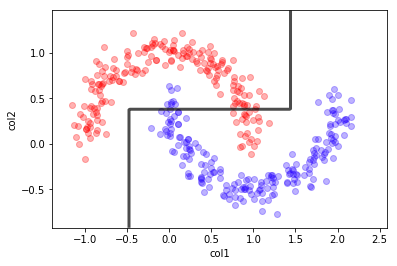

In [133]:
dt = DecisionTreeClassifier(max_depth=2); dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col1"); plt.ylabel("col2");

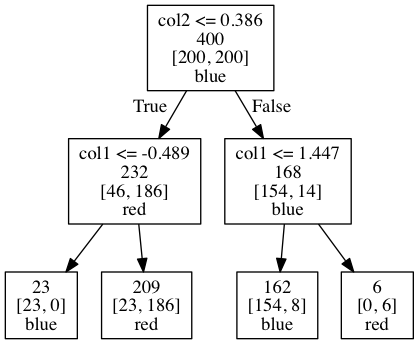

In [134]:
visualize_tree(dt, ["col1", "col2"])
Image("/tmp/dt.png", width=300)

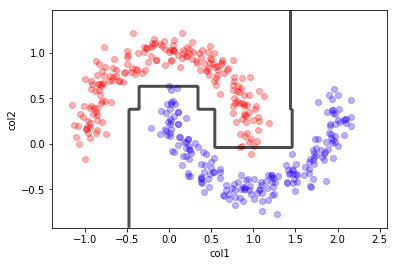

In [135]:
dt = DecisionTreeClassifier(max_depth=5); 
dt.fit(X,y)
#plot_2Ddata_with_boundary(dt.predict, X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

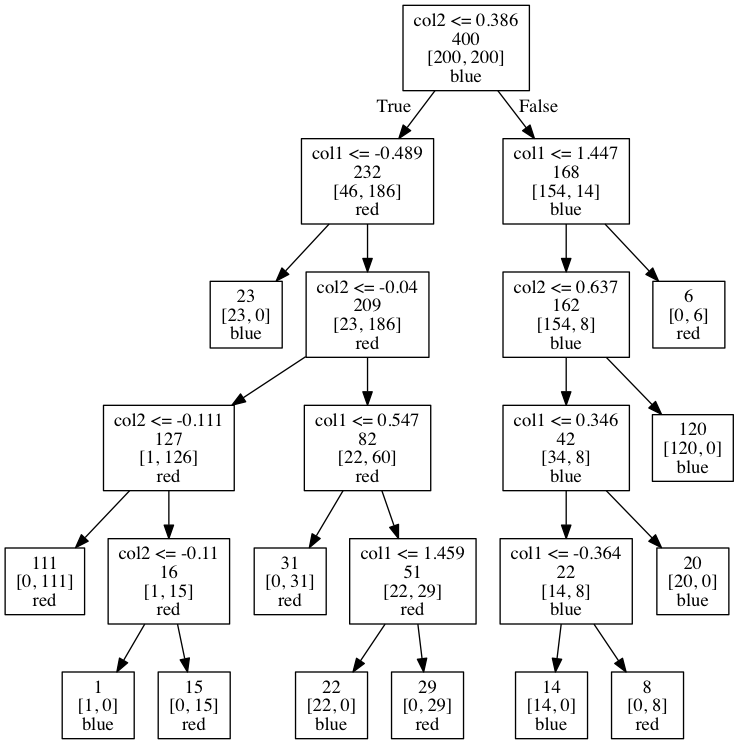

In [136]:
visualize_tree(dt, ["col1", "col2"])
Image("/tmp/dt.png", width=400)

## Naive Bayes

(0.479575, 0.520425)

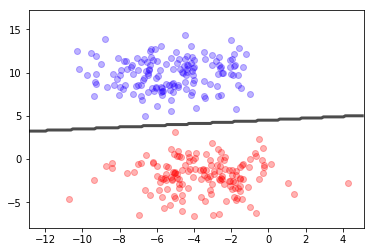

In [128]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(0.679125, 0.320875)

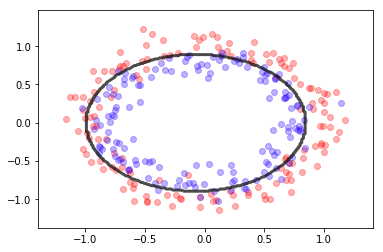

In [126]:
X,y = make_circles(300, noise=.1)
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(0.479575, 0.520425)

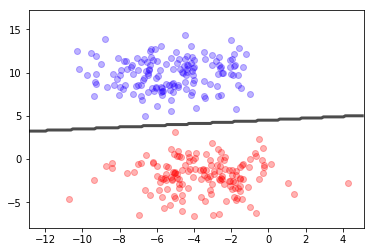

In [127]:
X,y = make_blobs(300, centers=2, cluster_std=2)
gb = GaussianNB()
gb.fit(X,y)

mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


observa que si alguna de las variables no es independiente el método falla

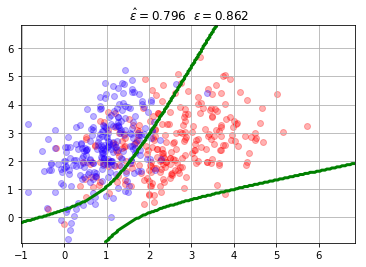

In [119]:
import mlutils
mc = mlutils.Example_Bayes2DClassifier(mean0=[2.5, 2.5], cov0=[[.9, .1], 
                                                               [0.8, 1.1]],
                                        mean1=[1, 2.5], cov1=[[0.5,.8],
                                                             [0.1,0.9]])
X,y = mc.sample(500)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();


0.832


(0.641075, 0.358925)

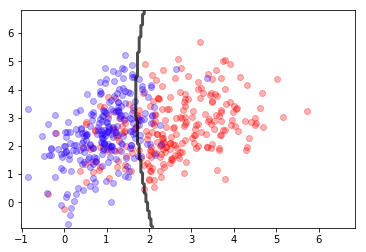

In [122]:
gb.fit(X,y)
print gb.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


## Support vector machines

observa que $\gamma$ representa **cuanto de cercanos han de estar dos puntos para considerarlos similares**

0.8525


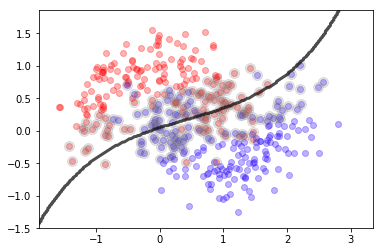

In [24]:
from sklearn.svm import SVC
X,y = make_moons(400, noise=0.3)
sv = SVC(gamma=.1)
sv.fit(X,y)
print sv.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.2, color="gray")

0.9125


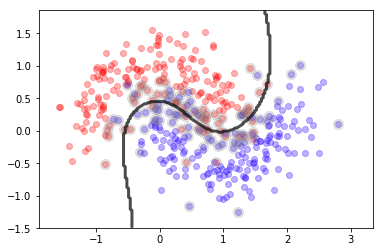

In [25]:
sv = SVC(gamma=1)
sv.fit(X,y)
print sv.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.2, color="gray")

0.97


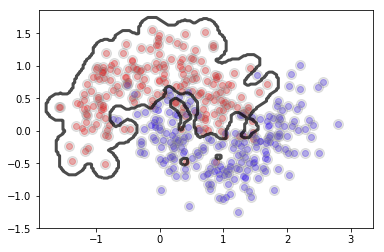

In [26]:
sv = SVC(gamma=100)
sv.fit(X,y)
print sv.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.2, color="gray")

## Random forests

0.97


(0.478625, 0.521375)

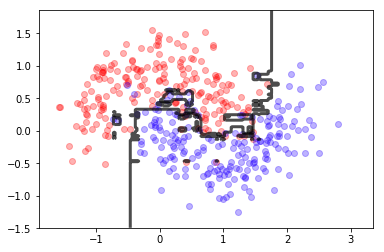

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)
print sv.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


0.9375


(0.47645, 0.52355)

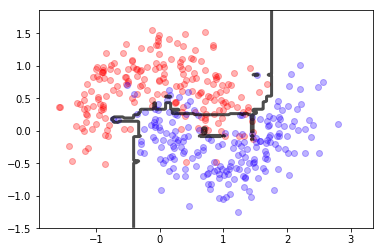

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=15)
rf.fit(X,y)
print rf.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
